In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("Ipl Data/deliveries.csv")
df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [3]:
df[df["noball_runs"]!=0]     # all the no-ball deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN
182,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,10,1,KM Jadhav,TM Head,MC Henriques,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
1440,7,1,Kolkata Knight Riders,Mumbai Indians,3,3,CA Lynn,G Gambhir,JJ Bumrah,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
1443,7,1,Kolkata Knight Riders,Mumbai Indians,3,6,CA Lynn,G Gambhir,JJ Bumrah,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
1545,7,1,Kolkata Knight Riders,Mumbai Indians,20,2,MK Pandey,SP Narine,MJ McClenaghan,0,...,0,0,1,0,4,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190972,1216537,1,Kings XI Punjab,Rajasthan Royals,19,2,GJ Maxwell,CH Gayle,Kartik Tyagi,0,...,0,0,5,0,0,5,5,NaN,NaN,NaN
192737,1237178,1,Royal Challengers Bangalore,Sunrisers Hyderabad,11,5,AB de Villiers,AB de Villiers,S Nadeem,0,...,0,0,2,0,0,2,2,NaN,NaN,NaN
192824,1237178,2,Sunrisers Hyderabad,Royal Challengers Bangalore,5,2,DA Warner,MK Pandey,Washington Sundar,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN
192950,1237180,1,Delhi Capitals,Sunrisers Hyderabad,6,2,S Dhawan,MP Stoinis,S Nadeem,0,...,0,0,5,0,0,5,5,NaN,NaN,NaN


In [4]:
bowlers=df[df["noball_runs"]!=0].bowler   #list of all bowlers who have bowled a no-ball
bowlers

9               A Choudhary
182            MC Henriques
1440              JJ Bumrah
1443              JJ Bumrah
1545         MJ McClenaghan
                ...        
190972         Kartik Tyagi
192737             S Nadeem
192824    Washington Sundar
192950             S Nadeem
193011             S Nadeem
Name: bowler, Length: 764, dtype: object

**Counting the total number of no-balls bowled by the bowlers**

In [5]:
df2 = pd.DataFrame({'Name' : bowlers}) 

# counting the duplicates 
bowler_names = df2.pivot_table(index = ['Name'], aggfunc ='size') 

# displaying the duplicate Series 
bowler_names

Name
A Ashish Reddy     2
A Choudhary        1
A Kumble           5
A Mishra          21
A Mithun           9
                  ..
Y Nagar            4
YA Abdulla         1
YS Chahal          8
Yuvraj Singh       1
Z Khan             2
Length: 204, dtype: int64

**Result: the bowler who has bowled the max number of no-balls**

In [6]:
bowler_names[bowler_names==max(bowler_names)]

Name
JJ Bumrah      23
S Sreesanth    23
dtype: int64

In [7]:
# Top 10 bowlers who have bowled Most number of no-balls

top_10=bowler_names.sort_values(ascending=False)[:10]
top_10

Name
JJ Bumrah      23
S Sreesanth    23
A Mishra       21
I Sharma       21
UT Yadav       19
SL Malinga     18
AB Dinda       14
SR Watson      13
B Lee          13
JA Morkel      13
dtype: int64

[Text(0.5, 1.0, 'Top 10 bowlers to have bowled Most no. of No-Balls'),
 Text(0.5, 0, 'Number of no-balls')]

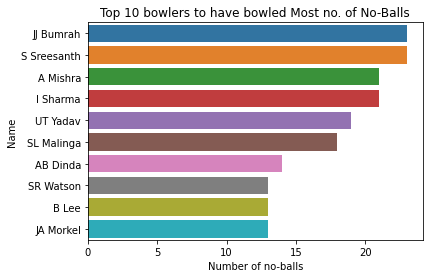

In [8]:
plot1=sns.barplot(x=top_10,y=top_10.index)
plot1.set(title="Top 10 bowlers to have bowled Most no. of No-Balls",xlabel="Number of no-balls")

In [9]:
#all more than 1 runs scored on no-balls
runs=df[(df["noball_runs"]!=0) & (df["noball_runs"]!=1)].noball_runs

**Calculating the frequency of extra-runs scored on no-balls**

In [10]:
df3=pd.DataFrame({"runs_scored" : runs})

no_ball_runs = df3.pivot_table(index = ["runs_scored"], aggfunc = 'size')
no_ball_runs
#NO-sixes were scored on a No-Ball

runs_scored
2    23
3     6
5    14
7     4
dtype: int64

[Text(0.5, 1.0, 'Runs scored on No-Balls'), Text(0, 0.5, 'frequency')]

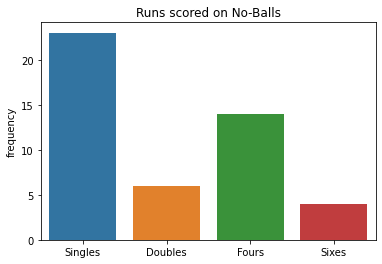

In [11]:
plot2=sns.barplot(x=["Singles","Doubles","Fours","Sixes"],y=no_ball_runs)
plot2.set(title="Runs scored on No-Balls",ylabel="frequency")



In [12]:
# plot2.figure.savefig("ss7.png")

In [13]:
# plot1.figure.savefig("ss8.png")

In [14]:
#Number of Boundaries in No Balls
boundaries = df[df["noball_runs"]>3].noball_runs
boundaries

30510     5
42590     5
47878     5
54477     5
134929    5
142424    5
179230    5
179584    7
179907    7
179908    7
182284    5
183483    7
184304    5
185608    5
186784    5
186787    5
190972    5
192950    5
Name: noball_runs, dtype: int64

In [15]:
#Total Number of Boundaries in No Balls
boundaries_on_no_balls=len(boundaries)
boundaries_on_no_balls

18

In [16]:
#Total number of No Balls
noballs = df[df["noball_runs"]!=0].noball_runs
total_no_balls=len(noballs)
total_no_balls

764

In [17]:
#Percentage of Boundaries in No Balls
percentage_of_boundaries = (boundaries_on_no_balls/total_no_balls)*100
percentage_of_boundaries

2.356020942408377